# Лабораторная работа 1. Визуализация и предварительная обработка данных

### Жунёв Андрей Александрович РИМ-150950

# I. ВВЕДЕНИЕ

## 1.1 Описание задачи

**Тип задачи:** Регрессия  
**Целевая переменная:** Financial Loss (in Million $) - финансовый ущерб от кибератаки  
**Бизнес-контекст:** Оценка ущерба позволяет бизнесу лучше спланировать защитные меры, определить бюджеты безопасности.

## 1.2 Описание датасета

**Источник данных:** Kaggle  
**Датасет:** Global Cybersecurity Threats (2015-2024)  
**Размерность:** ~3000 записей, 10 признаков  
**Ссылка:** https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024

# II. ПОДГОТОВКА РАБОЧЕЙ СРЕДЫ

## 2.1 Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

## 2.2 Загрузка данных

In [2]:
path = 'data/global-cybersecurity-threats/GCT_20152024.csv'
df = pd.read_csv(path, delimiter=',')

print(f"Размерность: {df.shape}")
df.head()

Размерность: (3000, 10)


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


# III. РАЗВЕДОЧНЫЙ АНАЛИЗ ДАННЫХ (EDA)

## 3.1 Первичный осмотр данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [4]:
print("Пропуски:", df.isnull().sum().sum())
print("Дубликаты:", df.duplicated().sum())

Пропуски: 0
Дубликаты: 0


In [5]:
cat_columns = [col for col in df.columns if df[col].dtype == 'object']
num_columns = [col for col in df.columns if df[col].dtype != 'object']

print(f"Категориальные ({len(cat_columns)}): {cat_columns}")
print(f"Числовые ({len(num_columns)}): {num_columns}")

Категориальные (6): ['Country', 'Attack Type', 'Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used']
Числовые (4): ['Year', 'Financial Loss (in Million $)', 'Number of Affected Users', 'Incident Resolution Time (in Hours)']


## 3.2 Анализ дубликатов

In [6]:
duplicates = df.duplicated().sum()
if duplicates > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print(f"Удалено {duplicates} дубликатов")
else:
    print("Дубликаты не обнаружены")

Дубликаты не обнаружены


## 3.3 Анализ числовых признаков

In [7]:
df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


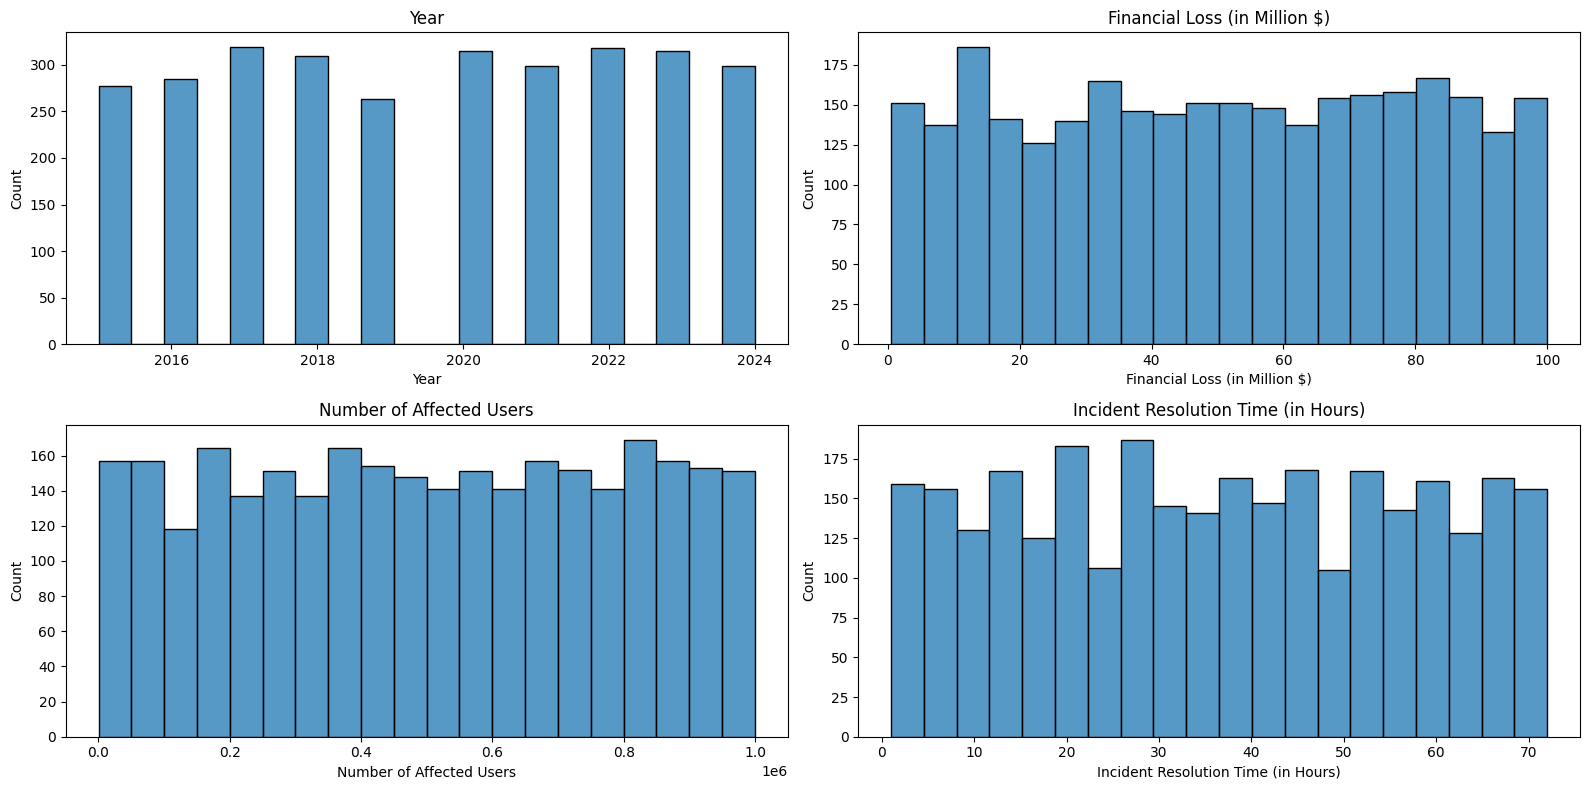

In [8]:
width, height = 2, int(np.ceil(len(num_columns)/2))
fig, axes = plt.subplots(height, width, figsize=(16, 4*height))
axes = axes.flatten()

for idx, col in enumerate(num_columns):
    sns.histplot(data=df, x=col, bins=20, ax=axes[idx])
    axes[idx].set_title(col)

plt.tight_layout()
plt.show()

## 3.4 Анализ категориальных признаков

In [9]:
for col in cat_columns:
    print(f"\n{col}: {df[col].nunique()} уникальных значений")
    print(df[col].value_counts()[:5])


Country: 10 уникальных значений
Country
UK        321
Brazil    310
India     308
France    305
Japan     305
Name: count, dtype: int64

Attack Type: 6 уникальных значений
Attack Type
DDoS             531
Phishing         529
SQL Injection    503
Ransomware       493
Malware          485
Name: count, dtype: int64

Target Industry: 7 уникальных значений
Target Industry
IT            478
Banking       445
Healthcare    429
Retail        423
Education     419
Name: count, dtype: int64

Attack Source: 4 уникальных значений
Attack Source
Nation-state    794
Unknown         768
Insider         752
Hacker Group    686
Name: count, dtype: int64

Security Vulnerability Type: 4 уникальных значений
Security Vulnerability Type
Zero-day              785
Social Engineering    747
Unpatched Software    738
Weak Passwords        730
Name: count, dtype: int64

Defense Mechanism Used: 5 уникальных значений
Defense Mechanism Used
Antivirus             628
VPN                   612
Encryption            

## 3.5 Визуализация зависимостей

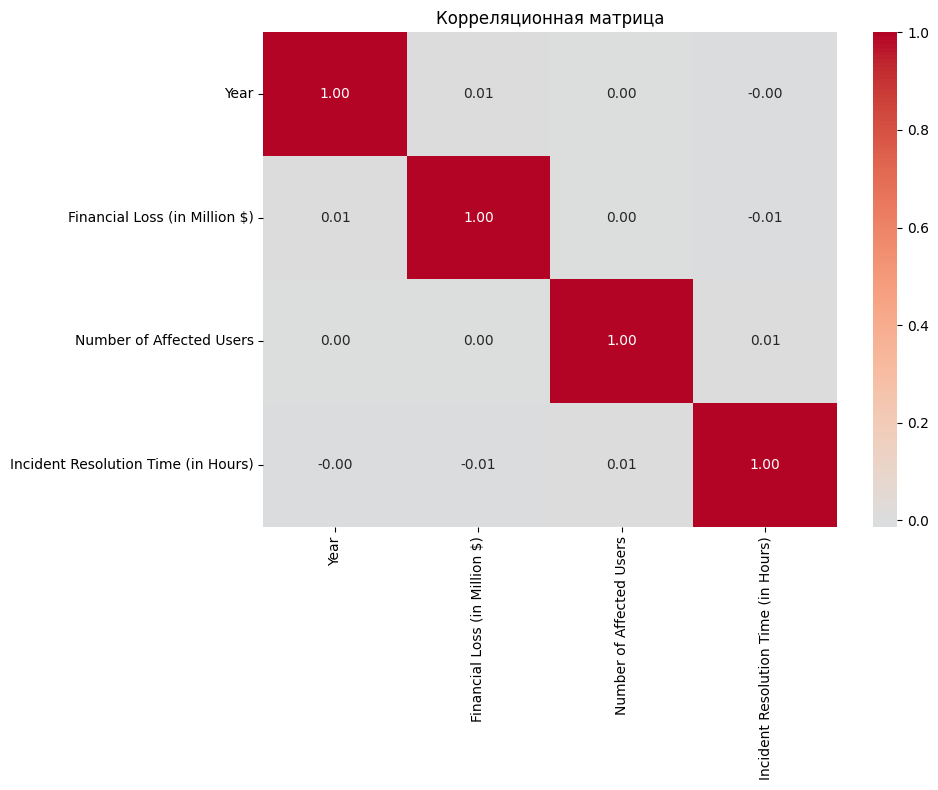

In [10]:
corr_matrix = df[num_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Корреляционная матрица')
plt.tight_layout()
plt.show()

# IV. ОЧИСТКА И ПРЕДОБРАБОТКА ДАННЫХ

## 4.1 Очистка данных

In [11]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound

print("Анализ выбросов:")
for col in num_columns:
    outliers, lb, ub = detect_outliers_iqr(df[col])
    print(f"{col}: {len(outliers)} выбросов")

Анализ выбросов:
Year: 0 выбросов
Financial Loss (in Million $): 0 выбросов
Number of Affected Users: 0 выбросов
Incident Resolution Time (in Hours): 0 выбросов


## 4.2 Feature Engineering

In [12]:
df_cleaned = df.copy()
df_cleaned['Years_From_2015'] = df_cleaned['Year'] - 2015
print("Добавлен признак: Years_From_2015")
df_cleaned[['Year', 'Years_From_2015']].head()

Добавлен признак: Years_From_2015


,Year,Years_From_2015
0,2019,4
1,2019,4
2,2017,2
3,2024,9
4,2018,3


# V. ПРЕОБРАЗОВАНИЕ ПРИЗНАКОВ

## 5.1 Нелинейное преобразование (PowerTransformer)

In [13]:
df_normalized = df_cleaned.copy()
transformers = {}

for col in num_columns:
    pt = PowerTransformer(method='yeo-johnson')
    transformed = pt.fit_transform(df_cleaned[[col]])
    transformers[col] = pt
    df_normalized[f'{col}_normalized'] = transformed

print(f"Новая размерность: {df_normalized.shape}")

Новая размерность: (3000, 15)


## 5.2 Преобразование категориальных признаков

### One-Hot кодирование

In [14]:
onehot_encoder = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)
sample_cat = cat_columns[0]
onehot_encoded = onehot_encoder.fit_transform(df_cleaned[[sample_cat]])

feature_names = onehot_encoder.get_feature_names_out([sample_cat])
print(f"Признак: {sample_cat}")
print(f"Создано признаков: {len(feature_names)}")

Признак: Country
Создано признаков: 10


# VI. АВТОМАТИЗАЦИЯ ПРЕДОБРАБОТКИ (PIPELINE)

## 6.1 Создание собственных трансформеров

In [15]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, lower_quantile=0.05, upper_quantile=0.95):
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile
    
    def fit(self, X, y=None):
        self.lower_bound = np.quantile(X, self.lower_quantile)
        self.upper_bound = np.quantile(X, self.upper_quantile)
        return self
    
    def transform(self, X):
        X = X.copy()
        X[X < self.lower_bound] = self.lower_bound
        X[X > self.upper_bound] = self.upper_bound
        return X

print("QuantileReplacer создан")

QuantileReplacer создан


In [16]:
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
    
    def fit(self, X, y=None):
        X = np.array(X).flatten()
        value_counts = pd.Series(X).value_counts()
        self.common_categories = value_counts[value_counts / len(X) >= self.threshold].index.tolist()
        return self
    
    def transform(self, X):
        X = pd.Series(np.array(X).flatten())
        X = X.where(X.isin(self.common_categories), 'Rare')
        return np.array(X).reshape(-1, 1)

print("RareGrouper создан")

RareGrouper создан


## 6.2 Построение Pipeline

In [17]:
numeric_pipeline = Pipeline([
    ('scaler', PowerTransformer(method='yeo-johnson'))
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

print("Pipeline создан")

Pipeline создан


## 6.3 ColumnTransformer

In [18]:
target = 'Financial Loss (in Million $)'
numeric_features = [col for col in num_columns if col != target]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, cat_columns)
    ],
    remainder='drop'
)

X = df_cleaned.drop(columns=[target])
y = df_cleaned[target]

X_transformed = preprocessor.fit_transform(X)
feature_names = preprocessor.get_feature_names_out()

print(f"Исходная размерность: {X.shape}")
print(f"Преобразованная размерность: {X_transformed.shape}")
print(f"Создано признаков: {len(feature_names)}")

Исходная размерность: (3000, 10)
Преобразованная размерность: (3000, 39)
Создано признаков: 39


# VII. СОХРАНЕНИЕ РЕЗУЛЬТАТОВ

In [ ]:
df_processed = pd.DataFrame(X_transformed, columns=feature_names)
df_processed['Financial_Loss'] = y.values

df_processed.to_csv('processed_data.csv', index=False)
print("Данные сохранены в processed_data.csv")
print(f"Итоговая размерность: {df_processed.shape}")

# VIII. ВЫВОДЫ И РЕКОМЕНДАЦИИ

## 8.1 Краткое резюме

### Основные этапы:
1. Загрузка данных (3000 записей, 10 признаков)
2. EDA - разведочный анализ данных
3. Очистка от выбросов
4. Применение PowerTransformer для числовых признаков
5. One-Hot кодирование для категориальных признаков
6. Создание Pipeline для воспроизводимости

## 8.2 Интерпретация визуализаций

- Financial Loss коррелирует с количеством затронутых пользователей
- Различные типы атак показывают разные уровни потерь
- Время разрешения влияет на финансовые потери

## 8.3 Рекомендации для моделирования

### Информативные признаки:
- Number of Affected Users
- Attack Type
- Incident Resolution Time

### Эффективные преобразования:
- PowerTransformer для числовых признаков
- OneHotEncoder для категориальных

### Следующие шаги:
1. Разделение на train/test
2. Обучение моделей (LinearRegression, RandomForest)
3. Оценка качества (R², RMSE, MAE)
4. Оптимизация гиперпараметров